In [1]:
# Python 3.10.6
import cv2
import matplotlib.pyplot as plt
import time
import os

In [5]:
def cv2_imshow_plt(img):
    """
    Display RGB image loaded from cv2.imread()
    """
    if len(img.shape) == 3: # BGR
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    elif len(img.shape) == 2: # grayscale
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    else:
        raise ValueError("sth is wrong")
    plt.axis('off')

In [32]:
# Not good, do not use
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def haar_cascade(img):
    faces = face_cascade.detectMultiScale(img, 1.2, 3)
    # faces = face_cascade.detectMultiScale(
    #     img,
    #     scaleFactor=1.1,
    #     minNeighbors=4,
    #     minSize=(20, 20)
    # )
    # faces = face_cascade.detectMultiScale(img)
    # for (x, y, w, h) in faces:
    #     face = img[y:y+h, x:x+w]
    #     return face
    return faces


file = "dataset_test/0/hiepnm_5.jpg"
img = cv2.imread(file)
faces = haar_cascade(img)
for x_start, y_start, w, h in faces:
        # face_crop = img[y_start:y_end, x_start:x_end]
        cv2.rectangle(img, (x_start, y_start), (x_start + w, y_start + h), (0, 0, 255), 2)
        # plt.subplot(2, 3, count)
        # count += 1
        cv2_imshow_plt(img)
# cv2.imshow(face)
# cv2.waitKey(0)

In [10]:
# SSD is better, please use this.
net = cv2.dnn.readNetFromCaffe("ssd/deploy.prototxt.txt", "ssd/res10_300x300_ssd_iter_140000.caffemodel")

def detect_faces_dnn(image):
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()
    faces = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.7:  # Confidence threshold
            box = detections[0, 0, i, 3:7] * [w, h, w, h]
            faces.append(box.astype("int"))
    return faces


0.20741796493530273


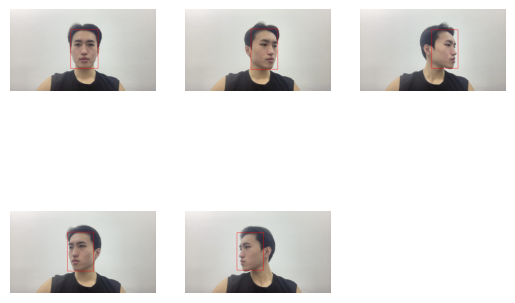

In [18]:
# DNN-based SSD model
start = time.time()
count = 1


while count < 6:
    # file = "dataset_test/"+ "1/" + "lamnt_"+ str(count) +".jpg"
    # file = "dataset_test/"+ "0/" + "hiepnm_"+ str(count) +".jpg"
    file = "dataset_test/"+ "2/" + "minhvb_"+ str(count) +".jpg"
    img = cv2.imread(file)
    faces = detect_faces_dnn(img)

    for x_start, y_start, x_end, y_end in faces:
        # face_crop = img[y_start:y_end, x_start:x_end]
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)
        plt.subplot(2, 3, count)
        count += 1
        cv2_imshow_plt(img)
finish = time.time()
print(finish - start)

0.14281702041625977


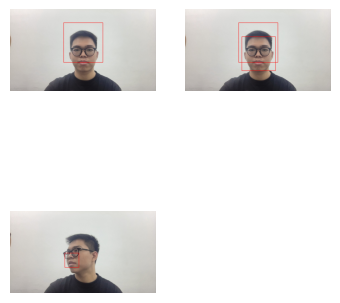

In [33]:
# Haar Cascade
# VERY BAD, DONT USE THIS
start = time.time()
count = 1

while count < 6:
    # file = "dataset_test/"+ "1/" + "lamnt_"+ str(count) +".jpg"
    file = "dataset_test/"+ "0/" + "hiepnm_"+ str(count) +".jpg"
    # file = "dataset_test/minhvb_"+ str(count) +".jpg"
    img = cv2.imread(file)
    faces = haar_cascade(img)
    if len(faces) == 0:
        count += 1
        continue
    for x_start, y_start, w, h in faces:
        # face_crop = img[y_start:y_end, x_start:x_end]
        cv2.rectangle(img, (x_start, y_start), (x_start + w, y_start + h), (0, 0, 255), 2)
        plt.subplot(2, 3, count)
        count += 1
        cv2_imshow_plt(img)
finish = time.time()
print(finish - start)

In [ ]:
# Save facial data, divided by folder

count = 1
folder = "dataset_test/"
des_folder = "testda/"
# Change ID to match with the person
# If the person is new, use id = str(len(os.listdir(folder))) + "/"
id = "3/"

for subfolder in os.listdir(folder):
    des = des_folder + subfolder + "/"
    if not os.path.exists(des):
        os.makedirs(des)

    for filename in os.listdir(folder + subfolder):
        # file = "dataset_test/lamnt_"+ str(count) +".jpg"
        # file = "dataset_test/hiepnm_"+ str(count) +".jpg"
        # file = "dataset_test/minhvb_"+ str(count) +".jpg"
        file = folder + subfolder + "/" + filename
        img = cv2.imread(file)
        faces = detect_faces_dnn(img)

        for x_start, y_start, x_end, y_end in faces:
            # face_crop = img[y_start:y_end, x_start:x_end]
            # cv2.rectangle(img, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)
            face = img[y_start:y_end, x_start:x_end]
            file = des + filename
            print(file)
            cv2.imwrite(file, face)
        # plt.subplot(2, 3, count)
        # cv2_imshow_plt(img)

testda/0/hiepnm_4.jpg
testda/0/hiepnm_5.jpg
testda/0/hiepnm_1.jpg
testda/0/hiepnm_2.jpg
testda/0/hiepnm_3.jpg
testda/1/lamnt_1.jpg
testda/1/lamnt_2.jpg
testda/1/lamnt_3.jpg
testda/1/lamnt_4.jpg
testda/1/lamnt_5.jpg
testda/2/minhvb_4.jpg
testda/2/minhvb_5.jpg
testda/2/minhvb_1.jpg
testda/2/minhvb_2.jpg
testda/2/minhvb_3.jpg


In [ ]:
folder = "dataset_test/"
des_folder = "dataset_crop_test/"
for f in os.listdir(folder):
    print(os.listdir(folder+f))

0hello.png
1hello.png
2hello.png
